In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


	<!-- age	sex	bmi	children	smoker	region	charges	log_charges
0	19	0.0	27.900	0	1.0	3.0	16884.92400	9.734236
1	18	1.0	33.770	1	0.0	2.0	1725.55230	7.453882
2	28	1.0	33.000	3	0.0	2.0	4449.46200	8.400763
3	33	1.0	22.705	0	0.0	1.0	21984.47061	9.998137
4	32	1.0	28.880	0	0.0	1.0	3866.85520	8.260455 -->

In [8]:
df.size

9366

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1    sex        1338 non-null   object 
 2    bmi        1338 non-null   float64
 3    children   1338 non-null   int64  
 4    smoker     1338 non-null   object 
 5    region     1338 non-null   object 
 6    charges    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.dtypes

age             int64
 sex           object
 bmi          float64
 children       int64
 smoker        object
 region        object
 charges      float64
dtype: object

In [11]:
df.columns=df.columns.str.strip()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking Missing Values

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df['bmi'].dtypes

dtype('float64')

In [16]:
for col in df.columns:
   if df[col].dtype=='object':
      print(f"{col} length -- {df[col].nunique()}")
      print(f"{col} -- {df[col].unique()}")
      print()

sex length -- 2
sex -- [' female' ' male  ']

smoker length -- 2
smoker -- [' yes   ' ' no    ']

region length -- 4
region -- [' southwest' ' southeast' ' northwest' ' northeast']



### EDA 

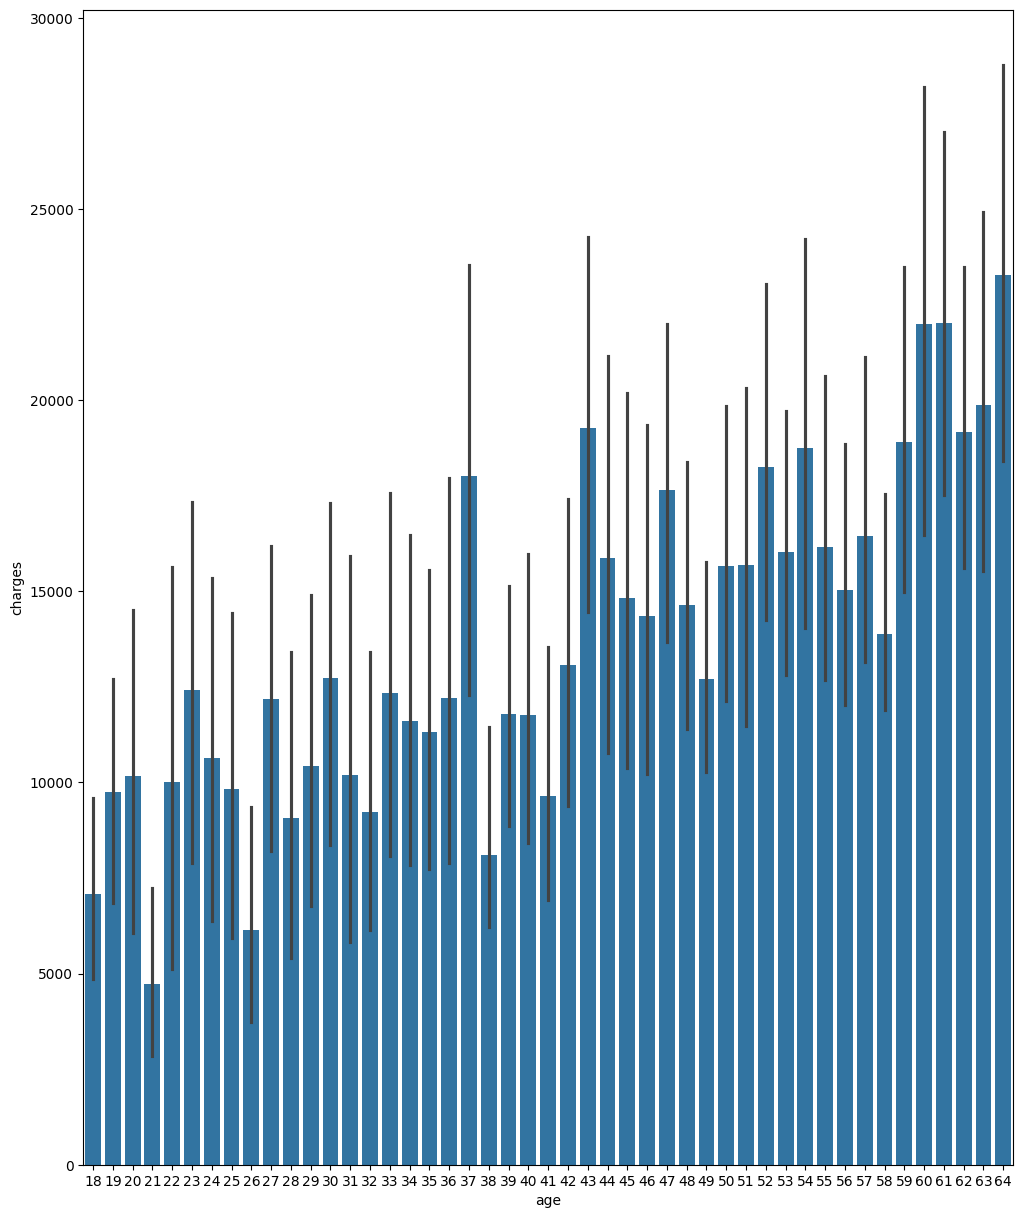

In [17]:
plt.figure(figsize=(12,15))
sns.barplot(x='age',y='charges',data=df)
plt.show()

Age is directly proportional to premium charges

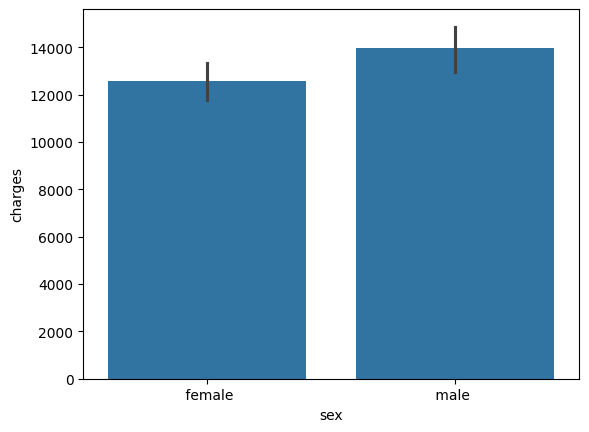

In [18]:
sns.barplot(x='sex',y='charges',data=df)
plt.show()

Charges for male are higher than female

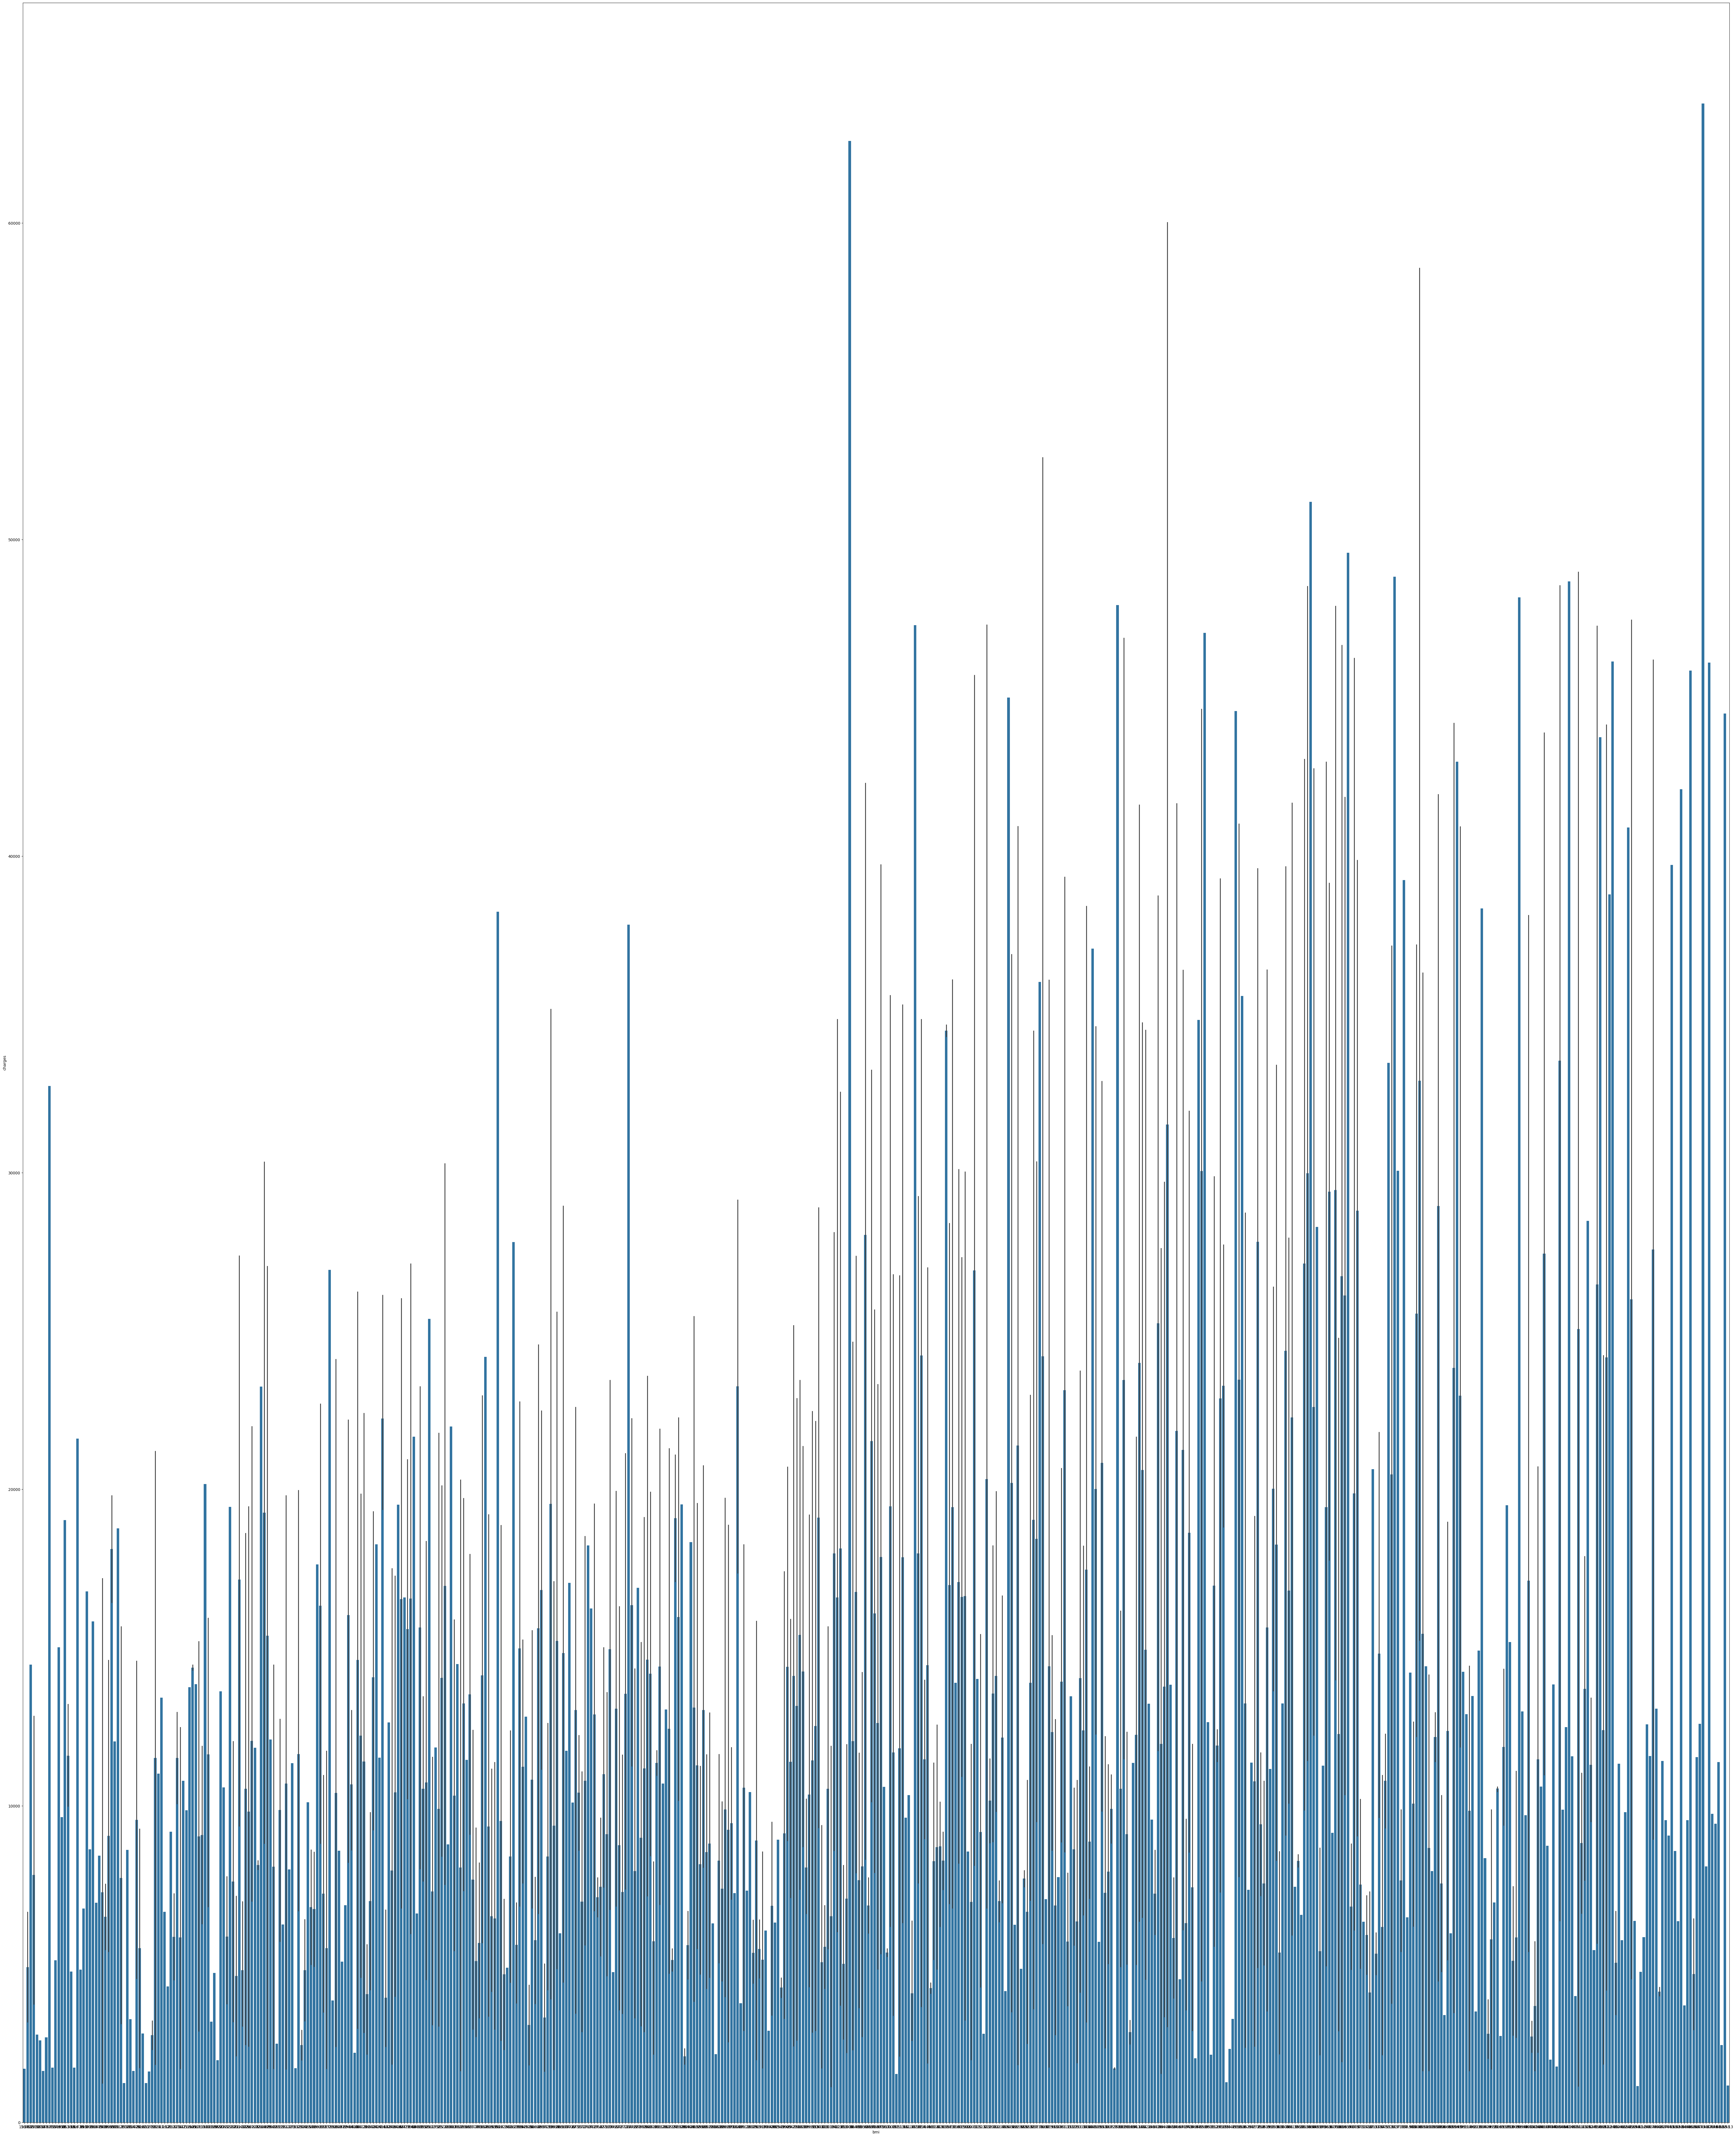

In [19]:
plt.figure(figsize=(80,100))
sns.barplot(x='bmi',y='charges',data=df)
plt.show()

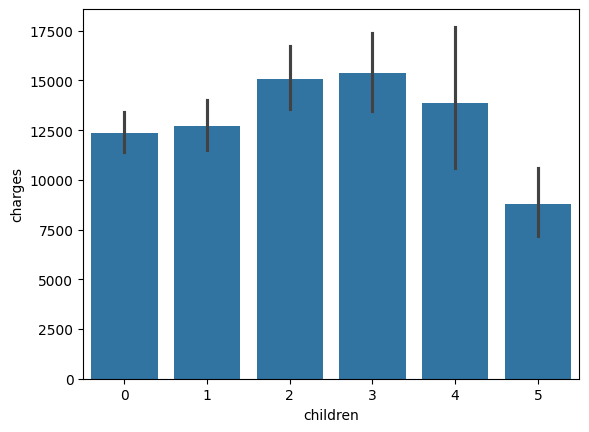

In [20]:
sns.barplot(x='children',y='charges',data=df)
plt.show()

charges increase with children.After 3 children charges are decreasing 

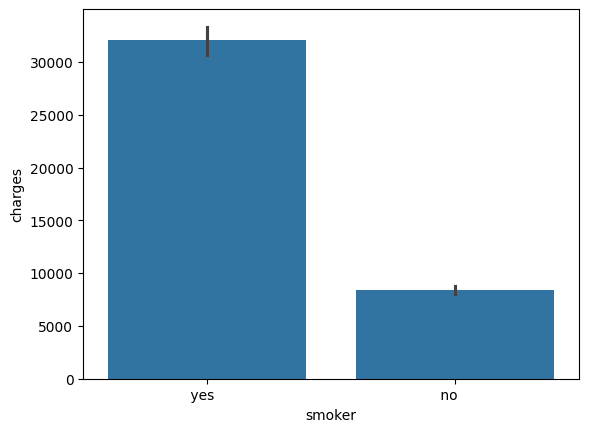

In [21]:
sns.barplot(x='smoker',y='charges',data=df)
plt.show()

Smokers need to pay more premium

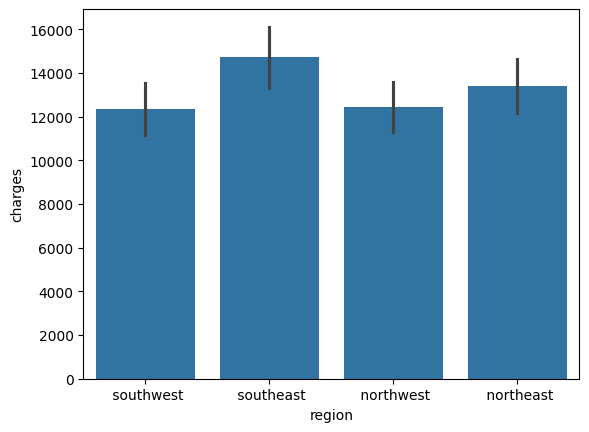

In [22]:
sns.barplot(x='region',y='charges',data=df)
plt.show()

Charges are increasing 
southeast --> northeast --> southwest --> nortwest 

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

To check null value

<Axes: >

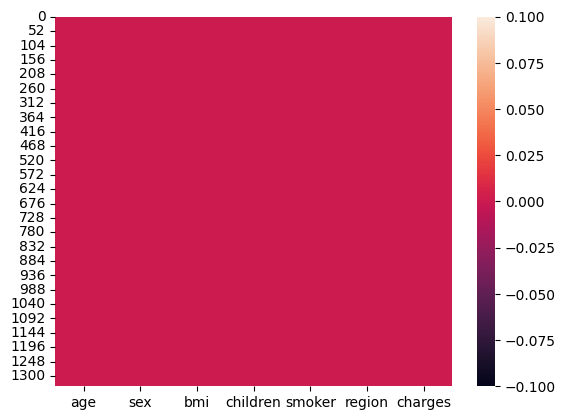

In [24]:
sns.heatmap(df.isnull())

In [25]:
for i in df.columns:
   print(df[i].value_counts())
   print("\n")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no        1064
yes        274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400  

In [26]:
num_cols=df.select_dtypes(exclude=(object)).columns
cat_cols=df.select_dtypes(include=(object)).columns

In [27]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [28]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [29]:
df.duplicated().sum()

1

sex
male      676
female    662
Name: count, dtype: int64


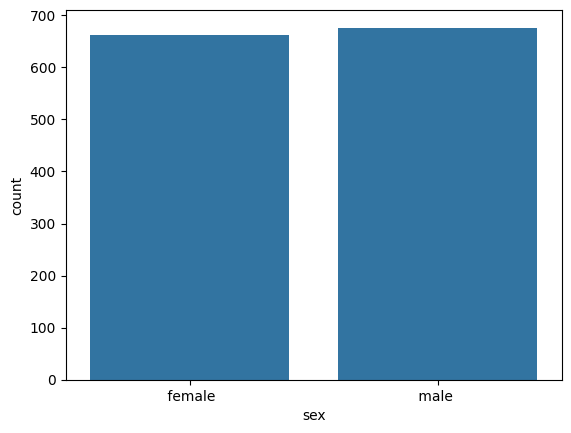

In [30]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64


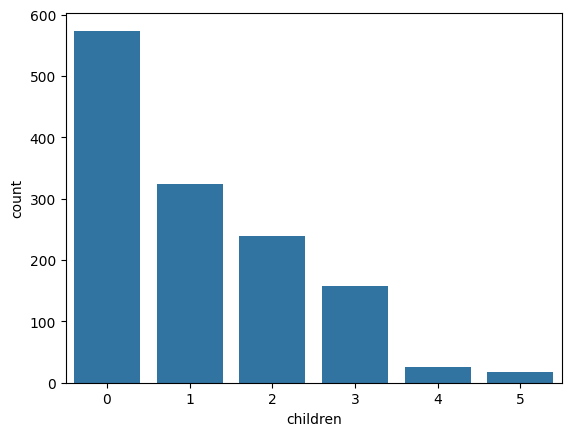

In [31]:
ax=sns.countplot(x='children',data=df)
print(df['sex'].value_counts())

In [32]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


Visualize data

sex
male      676
female    662
Name: count, dtype: int64


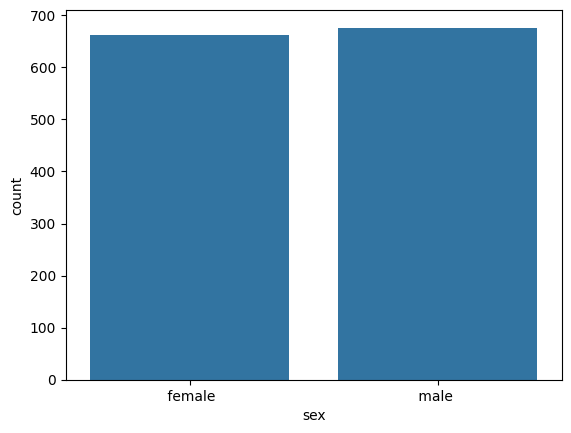

In [33]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


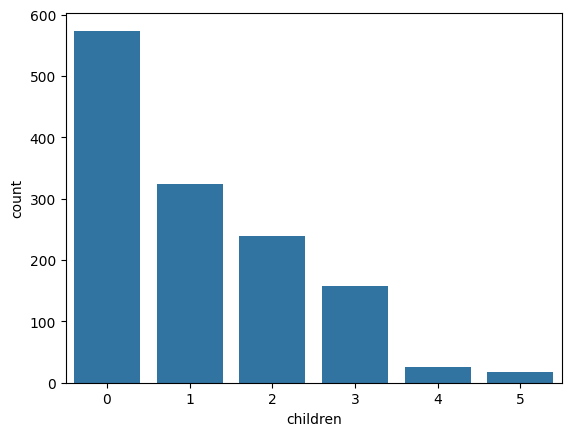

In [34]:
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

smoker
no        1064
yes        274
Name: count, dtype: int64


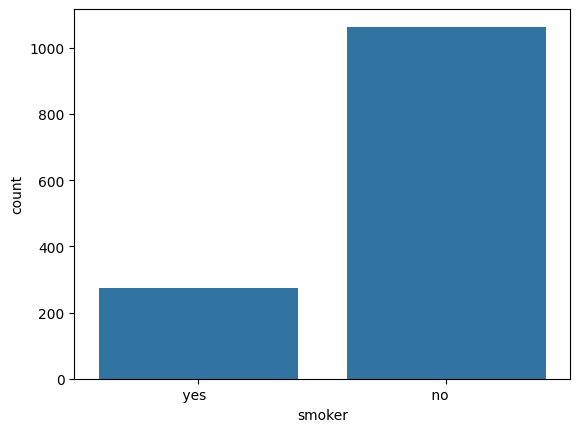

In [35]:
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


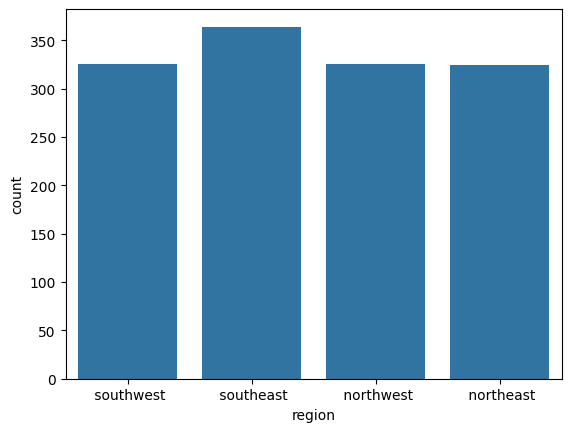

In [36]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())


Multivariate Analysis

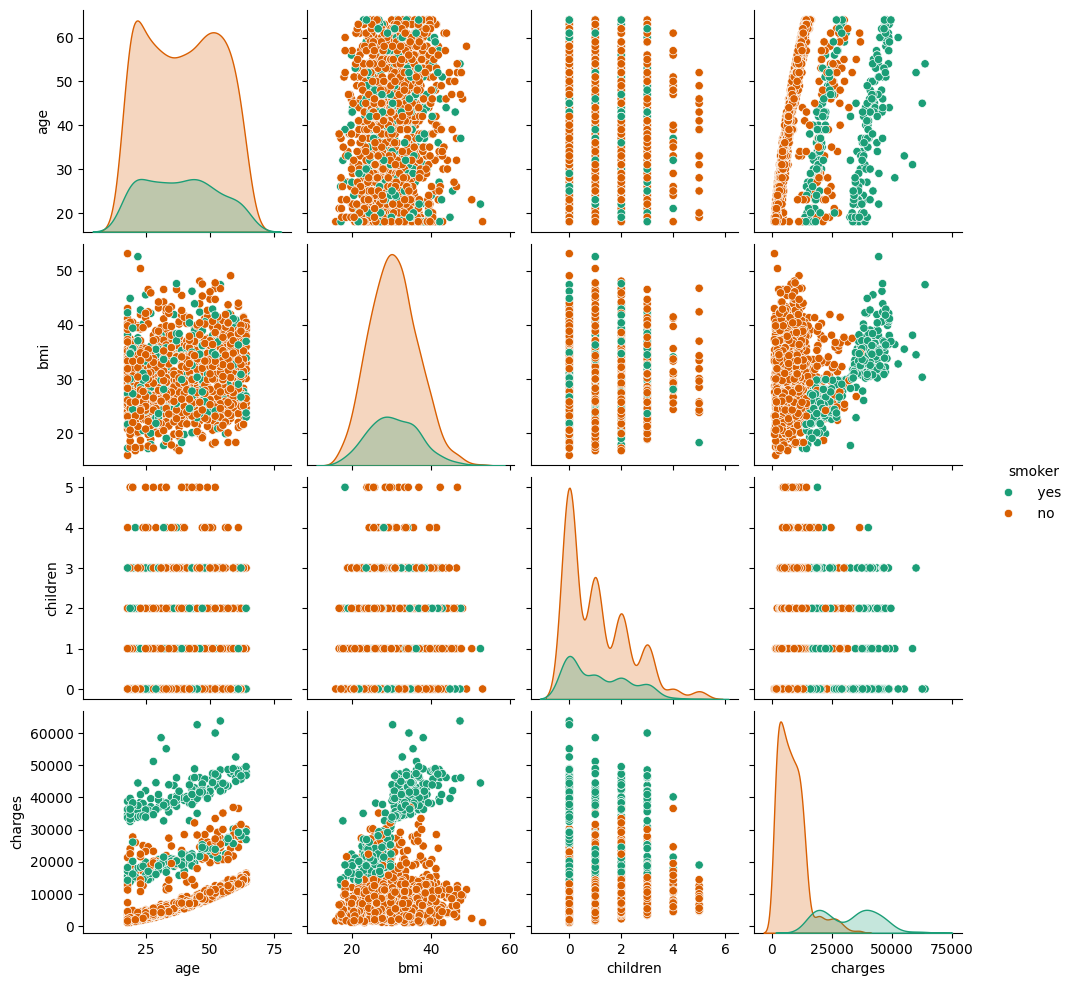

In [37]:
sns.pairplot(df,hue="smoker",palette="Dark2")
plt.show()


Checking for outliers

In [38]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\2507492904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[col],palette="Set2_r")
C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\2507492904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[col],palette="Set2_r")
C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\2507492904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[col],palette="Set2_r")
C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\2507492904.py:7: FutureWarning: 

Passing `palette` without assignin

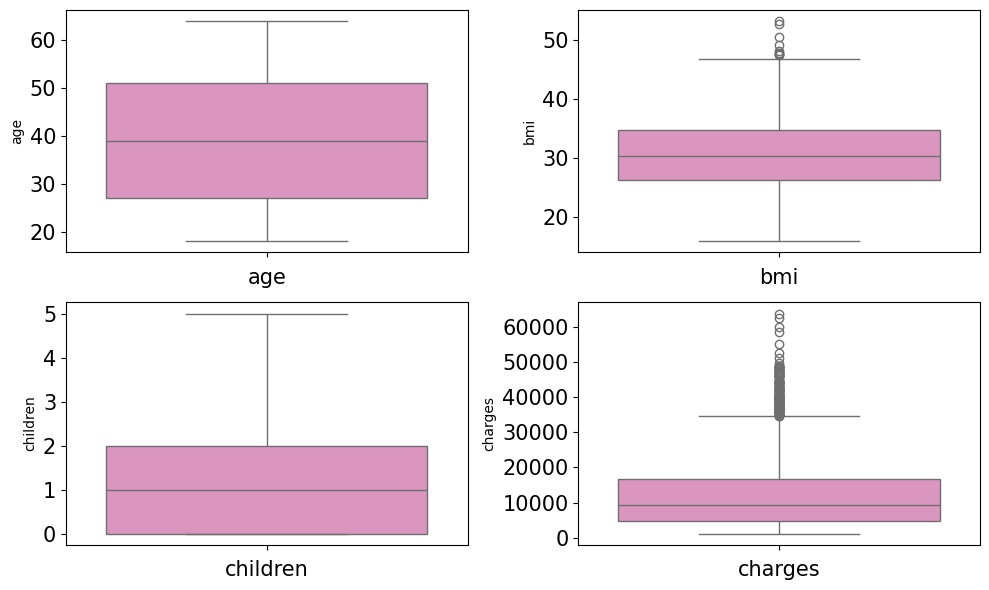

In [39]:
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1

for col in num_cols:
   if plotnumber <=4:
      ax=plt.subplot(2,2,plotnumber)
      sns.boxplot(df[col],palette="Set2_r")
      plt.xlabel(col,fontsize=15)
      plt.yticks(rotation=0,fontsize=15)
      plotnumber+=1
plt.tight_layout()

BMI and Charges cols have outliers

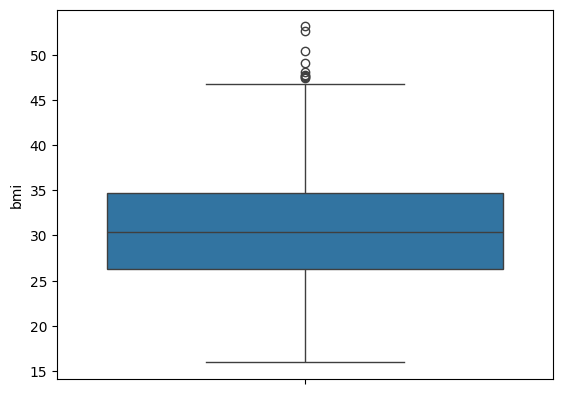

In [40]:
sns.boxplot(df["bmi"])
plt.show()

Outliers Treatment

In [41]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1

In [42]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)

13.7 47.290000000000006


In [43]:
#Identify Outliers

outliers=df.loc[(df['bmi']<lower_bound) | (df['bmi']>upper_bound)]
print(outliers)

      age      sex    bmi  children   smoker      region      charges
116    58   male    49.06         0   no       southeast  11381.32540
286    46   female  48.07         2   no       northeast   9432.92530
401    47   male    47.52         1   no       southeast   8083.91980
543    54   female  47.41         0   yes      southeast  63770.42801
847    23   male    50.38         1   no       southeast   2438.05520
860    37   female  47.60         2   yes      southwest  46113.51100
1047   22   male    52.58         1   yes      southeast  44501.39820
1088   52   male    47.74         1   no       southeast   9748.91060
1317   18   male    53.13         0   no       southeast   1163.46270


In [44]:
df1=df.loc[(df['bmi']>=lower_bound) & (df['bmi']<=upper_bound)]
df1.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
print("Old Dataframe",df.shape[0])
print("New Dataframe",df1.shape[0])

Old Dataframe 1338
New Dataframe 1329


In [46]:
data_loss=df1.shape[0]-df.shape[0],df1.shape[1]-df.shape[1]

print("data loss",data_loss)

data loss (-9, 0)


<Axes: ylabel='bmi'>

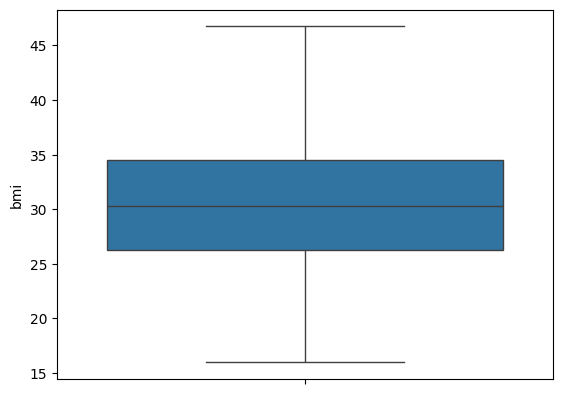

In [47]:
sns.boxplot(df1["bmi"])

In [48]:
print("Data Loss Percentage",((df1.shape[0]-df.shape[0])/df.shape[0])*100)

Data Loss Percentage -0.672645739910314


Now Checking Skewness

In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()

for i in df1.columns:
   if df1[i].dtypes=="object":
      df1[i]=ordinal_encoder.fit_transform(df1[i].values.reshape(-1,1))
df1

C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\482823040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=ordinal_encoder.fit_transform(df1[i].values.reshape(-1,1))
C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\482823040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=ordinal_encoder.fit_transform(df1[i].values.reshape(-1,1))
C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\482823040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [50]:
df1.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region     -0.031651
charges     1.500577
dtype: float64

Removing Skewness

In [51]:
charges_skewness=df1['charges'].skew()
print("Skewness of charges before transformation",charges_skewness)

#Apply logarithmic transformation to charges

df1['log_charges']=np.log1p(df1['charges'])

log_charges_skewness=df1['log_charges'].skew()
print("Skewness of log_charges after transformation",log_charges_skewness)

Skewness of charges before transformation 1.5005769673155465
Skewness of log_charges after transformation -0.09138628175661823


C:\Users\Sarvadnya\AppData\Local\Temp\ipykernel_3348\1294074560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_charges']=np.log1p(df1['charges'])


In [52]:
df1.skew()

age            0.058413
sex           -0.016573
bmi            0.157180
children       0.936628
smoker         1.471424
region        -0.031651
charges        1.500577
log_charges   -0.091386
dtype: float64

In [53]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400,9.734236
1,18,1.0,33.770,1,0.0,2.0,1725.55230,7.453882
2,28,1.0,33.000,3,0.0,2.0,4449.46200,8.400763
3,33,1.0,22.705,0,0.0,1.0,21984.47061,9.998137
4,32,1.0,28.880,0,0.0,1.0,3866.85520,8.260455


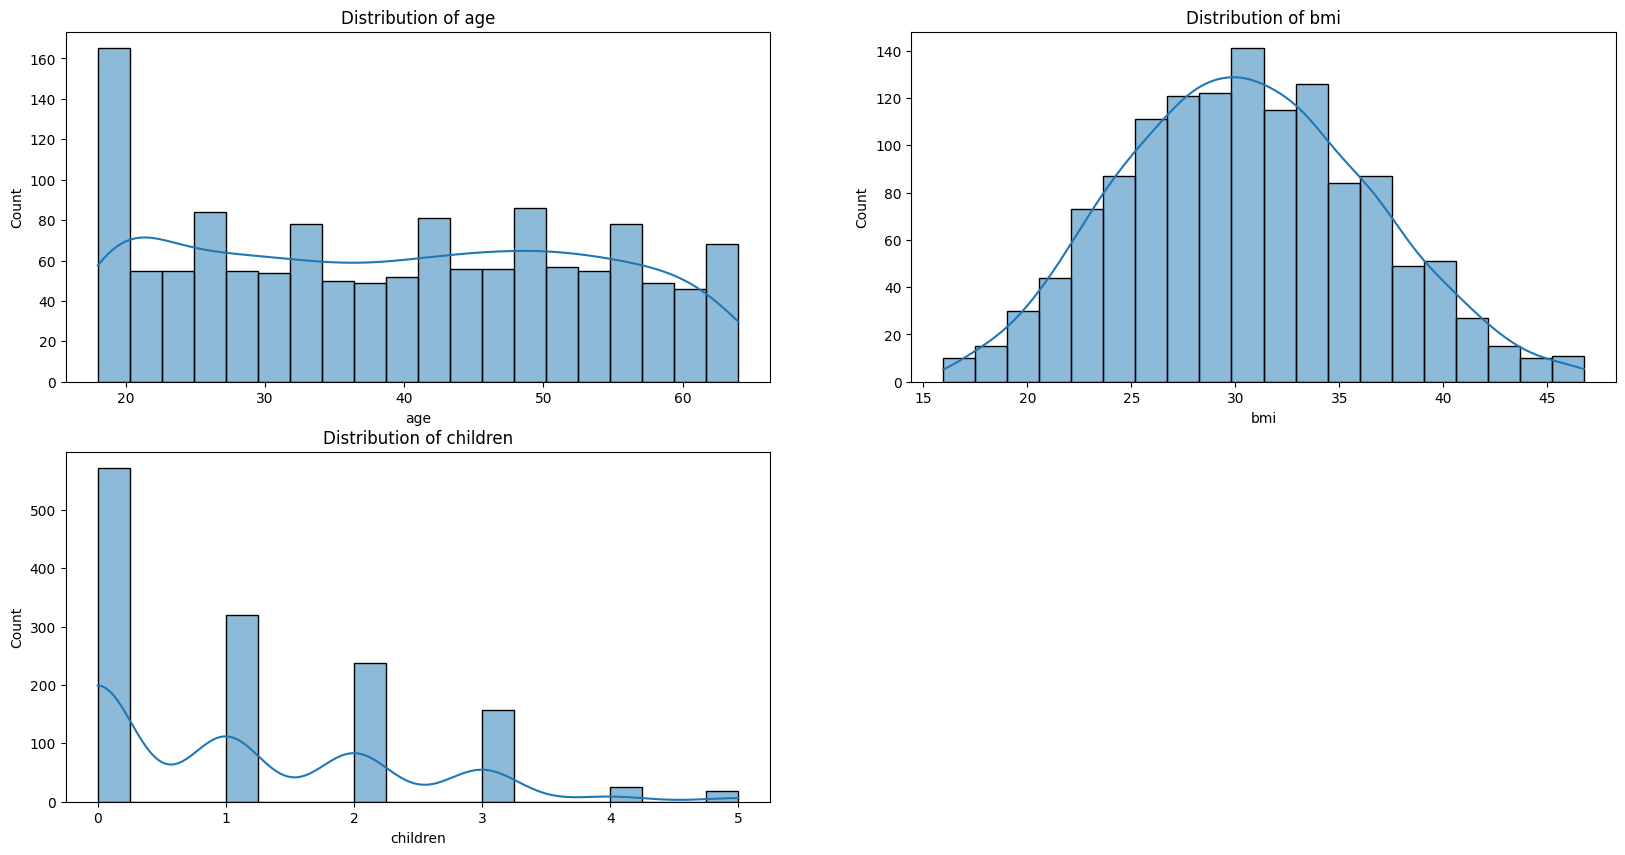

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(df1['age'],bins=20,kde=True)
plt.title('Distribution of age')

plt.subplot(2,2,2)
sns.histplot(df1['bmi'],bins=20,kde=True)
plt.title('Distribution of bmi')

plt.subplot(2,2,3)
sns.histplot(df1['children'],bins=20,kde=True)
plt.title('Distribution of children')

plt.show()

<Figure size 600x600 with 0 Axes>

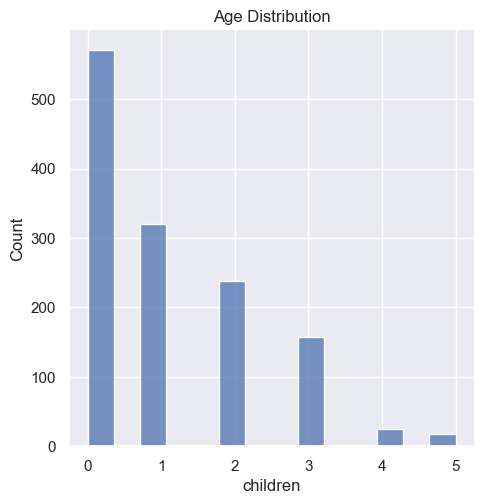

In [55]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df1['children'])
plt.title("Age Distribution")
plt.show()

In [56]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges,log_charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374,9.097210
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429,0.916326
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,7.023647
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200,8.463638
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800,9.144449
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710,9.716405
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090,11.044423


Correlation

In [57]:
corr=df1.corr()
corr

,age,sex,bmi,children,smoker,region,charges,log_charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022,0.529296
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394,0.009959
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196,0.133920
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739,0.161725
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912,0.663619
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730,-0.044967
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000,0.893973
log_charges,0.529296,0.009959,0.133920,0.161725,0.663619,-0.044967,0.893973,1.000000


<Axes: >

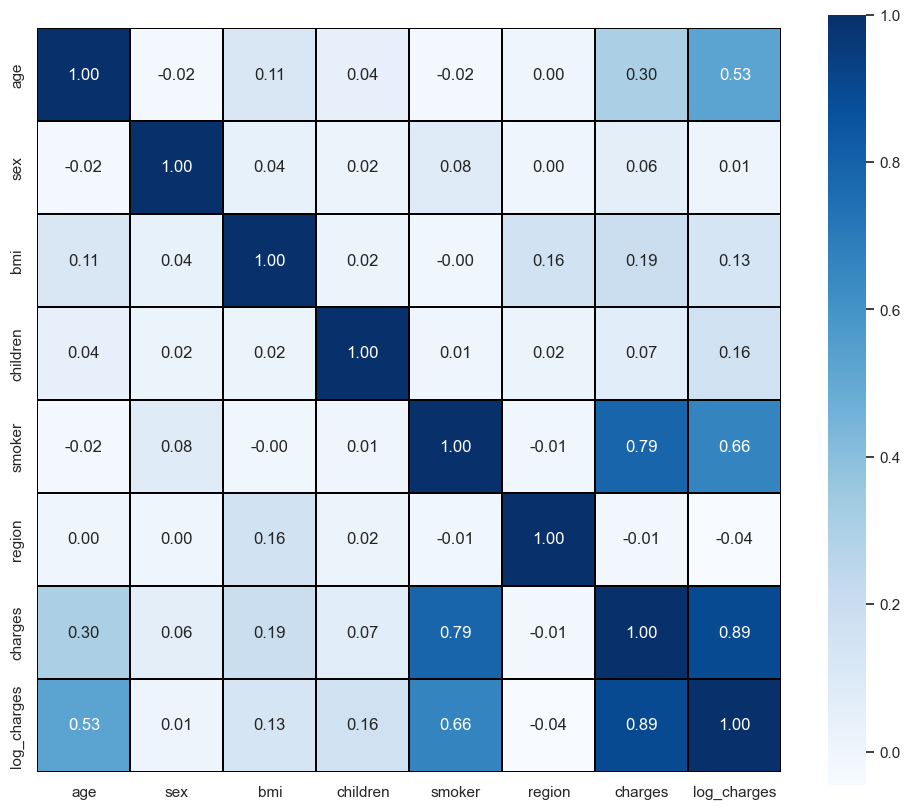

In [58]:
plt.figure(figsize=(12,10))

sns.heatmap(corr,annot=True,cmap="Blues",
linewidths=0.1,
linecolor="black",
fmt=".2f",
square=True)

### Correlation between label and features

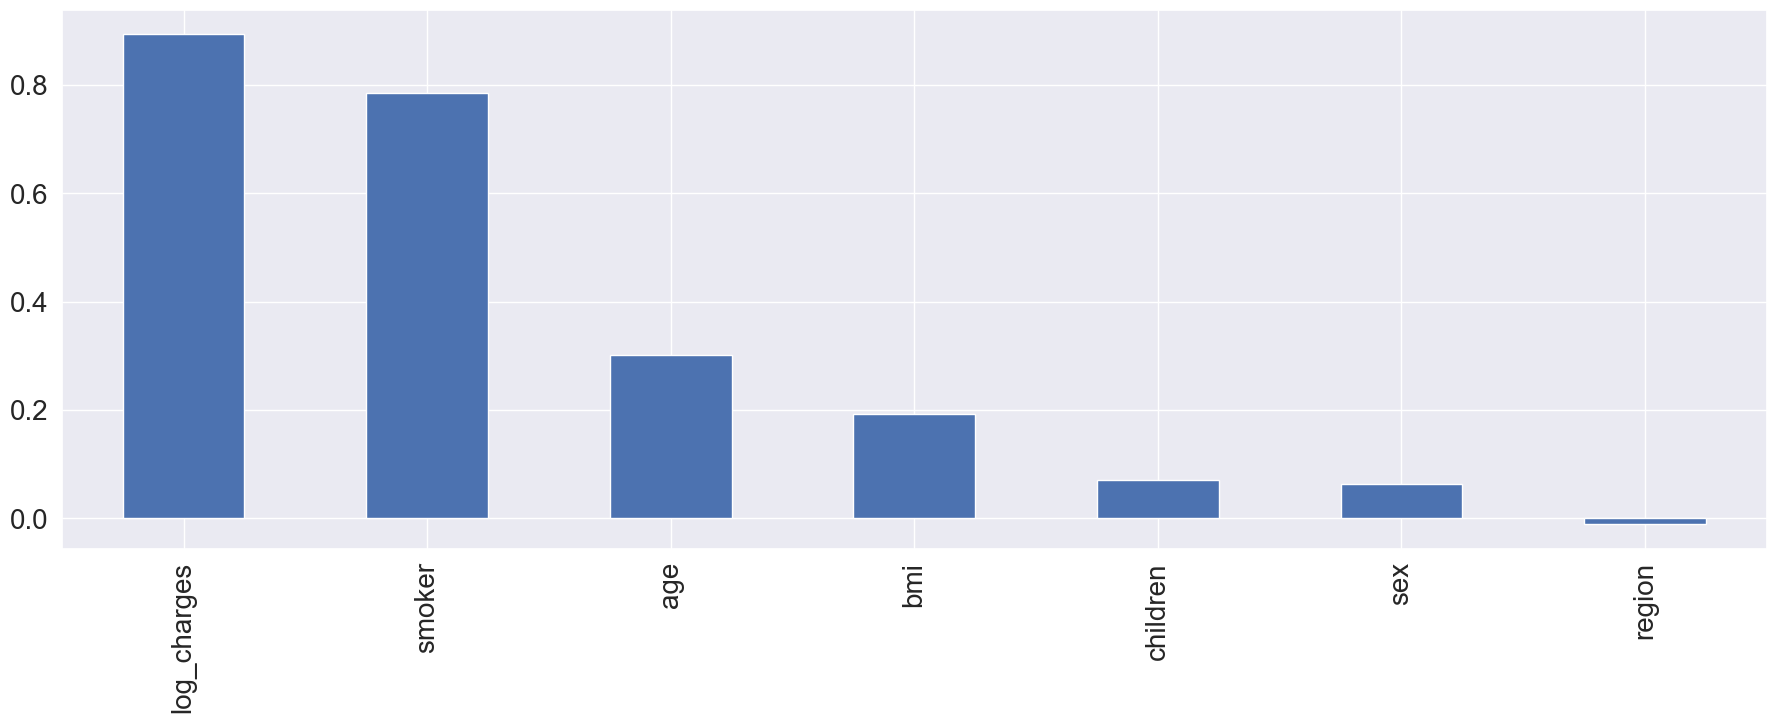

In [59]:
plt.figure(figsize=(22,7))
df1.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind="bar",fontsize=20)
plt.show()

Split features and target 

In [60]:
x=df1.drop(['charges','log_charges'],axis=1)
y=df1["log_charges"]
print("Features Dimensions",x.shape)
print("Label Dimensions",y.shape)

Features Dimensions (1329, 6)
Label Dimensions (1329,)


In [61]:
print(x)

      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1329 rows x 6 columns]


In [62]:
print(y)

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: log_charges, Length: 1329, dtype: float64


Features scaling using standard scaler

In [63]:
type(x)

pandas.core.frame.DataFrame

In [64]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [65]:
print(x)

      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1329 rows x 6 columns]


Feature scaling using standard scaler

In [66]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [67]:
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


Find best model

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


Creating train test split

In [69]:
maxAcc=0
maxRS=0

for i in range(1,200):
   X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)

   GBR=GradientBoostingRegressor()
   GBR.fit(X_train,y_train)
   y_pred=GBR.predict(X_test)
   accuracy=r2_score(y_test,y_pred)
   if accuracy>maxAcc:
      maxAcc=accuracy
      maxRS=i
print("Maximum r2 score is ",maxAcc,"on random state",maxRS)

Maximum r2 score is  0.9043176323658707 on random state 91


In [70]:
maxAcc

0.9043176323658707

In [71]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=91)

In [72]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (996, 6)
y_train shape (996,)
X_test shape (333, 6)
y_test shape (333,)


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor


### Linear Regression

In [74]:
model_score_train_data={}
model_score_data={}
def regression_model_func(model):
   regression_model=model
   regression_model.fit(X_train,y_train)
   y_pred=regression_model.predict(X_test)
   y_pred_train=regression_model.predict(X_train)
   
   print("*"*20)
   print(regression_model)
   print("R2_Score: ",r2_score(y_test,y_pred)*100)
   model_score_data[model]=r2_score(y_test,y_pred)*100
   print("R2_Score on train data: ",r2_score(y_train,y_pred_train)*100)
   model_score_train_data[model]=r2_score(y_train,y_pred_train)*100
   print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
   print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
   print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
   print("*"*20)

In [75]:
model_selection=[
   LinearRegression(),
   RandomForestRegressor(),
   DecisionTreeRegressor(),
   KNN(),
   Lasso(),
   Ridge(),
   SVR(),
   GradientBoostingRegressor()
   ]

In [76]:
for model in model_selection:
   regression_model_func(model)

********************
LinearRegression()
R2_Score:  82.55709819301957
R2_Score on train data:  74.52411710116782
Mean Absolute Error:  0.2511180039518876
Mean Squared Error:  0.14736683450483
Root Mean Squared Error:  0.3838838815381938
********************
********************
RandomForestRegressor()
R2_Score:  86.70170666987535
R2_Score on train data:  96.84376355242814
Mean Absolute Error:  0.1865319541449346
Mean Squared Error:  0.11235099607067146
Root Mean Squared Error:  0.33518800108397595
********************
********************
DecisionTreeRegressor()
R2_Score:  64.57205632587876
R2_Score on train data:  99.72063955259979
Mean Absolute Error:  0.23696728569082978
Mean Squared Error:  0.29931395418286005
Root Mean Squared Error:  0.5470959277703135
********************
********************
KNeighborsRegressor()
R2_Score:  85.09321789935909
R2_Score on train data:  84.03408364649384
Mean Absolute Error:  0.22455760755062779
Mean Squared Error:  0.12594035758119068
Root Mean Squ

In [77]:
data_cols = pd.Series(model_score_data.keys()).tolist()
data_values = pd.Series(model_score_data.values()).tolist()

In [78]:
print(data_cols)
print(data_values)
print(len(data_cols))
print(len(data_values))

[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), SVR(), GradientBoostingRegressor()]
[82.55709819301957, 86.70170666987535, 64.57205632587876, 85.09321789935909, -0.0028832041081061632, 82.5607863600038, 91.20494018670833, 90.43071230673712]
8
8


In [79]:
model_score_data

{LinearRegression(): 82.55709819301957,
 RandomForestRegressor(): 86.70170666987535,
 DecisionTreeRegressor(): 64.57205632587876,
 KNeighborsRegressor(): 85.09321789935909,
 Lasso(): -0.0028832041081061632,
 Ridge(): 82.5607863600038,
 SVR(): 91.20494018670833,
 GradientBoostingRegressor(): 90.43071230673712}

In [80]:
model_score_data.items()

dict_items([(LinearRegression(), 82.55709819301957), (RandomForestRegressor(), 86.70170666987535), (DecisionTreeRegressor(), 64.57205632587876), (KNeighborsRegressor(), 85.09321789935909), (Lasso(), -0.0028832041081061632), (Ridge(), 82.5607863600038), (SVR(), 91.20494018670833), (GradientBoostingRegressor(), 90.43071230673712)])

In [81]:
result_desc= dict(sorted(model_score_data.items(), key=lambda x: x[1], reverse=True))
train_result_desc= dict(sorted(model_score_train_data.items(), key=lambda x: x[1], reverse=True))

In [82]:
result_desc

{SVR(): 91.20494018670833,
 GradientBoostingRegressor(): 90.43071230673712,
 RandomForestRegressor(): 86.70170666987535,
 KNeighborsRegressor(): 85.09321789935909,
 Ridge(): 82.5607863600038,
 LinearRegression(): 82.55709819301957,
 DecisionTreeRegressor(): 64.57205632587876,
 Lasso(): -0.0028832041081061632}

In [83]:
train_result_desc

{DecisionTreeRegressor(): 99.72063955259979,
 RandomForestRegressor(): 96.84376355242814,
 GradientBoostingRegressor(): 86.92567169638004,
 KNeighborsRegressor(): 84.03408364649384,
 SVR(): 81.5328378919085,
 LinearRegression(): 74.52411710116782,
 Ridge(): 74.52403394378484,
 Lasso(): 0.0}

Checking cross validation score

In [84]:
from sklearn.model_selection import cross_val_score

# linear_reg=LinearRegression()
def cross_validation_check(model):
   regression_model=model
   score=cross_val_score(regression_model,x,y,cv=5,scoring='r2')
   print("Model is ",model)
   print(score)
   print(score.mean())
   print("Difference between R2 Score and cross validation score is ",(r2_score(y_test,y_pred)-score.mean())*100)
   print("*"*20)

In [85]:
for data in model_selection:
   cross_validation_check(data)

Model is  LinearRegression()
[0.79826833 0.68874983 0.82870346 0.76453    0.73208842]
0.7624680089658249
Difference between R2 Score and cross validation score is  -133.67243062925297
********************
Model is  RandomForestRegressor()
[0.84845808 0.70830246 0.85625888 0.82034143 0.79374859]
0.8054218869870026
Difference between R2 Score and cross validation score is  -137.96781843137074
********************
Model is  DecisionTreeRegressor()
[0.72703708 0.62207192 0.60158482 0.71392266 0.68004658]
0.6689326122201935
Difference between R2 Score and cross validation score is  -124.31889095468985
********************
Model is  KNeighborsRegressor()
[0.84904787 0.68921968 0.84257334 0.80867779 0.78275127]
0.7944539919133988
Difference between R2 Score and cross validation score is  -136.87102892401037
********************
Model is  Lasso()
[-1.92059506e-08 -5.05538549e-05 -2.23819986e-03 -1.14559701e-05
 -1.33705692e-03]
-0.0007274571617098324
Difference between R2 Score and cross valid

By model performance and cross validation check KNN Regression is the best model

Hyper parameter tuning

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn=KNeighborsRegressor()

#Define the param grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#initialise GridSearchCV
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(X_train,y_train)

#best params and best price
print("Best Parameters :",grid_search.best_params_)
print("Best R2 Score :",grid_search.best_score_)


Best Parameters : {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best R2 Score : 0.7760049623655455


In [87]:
#Initiate knn regressu

knn_regression=KNeighborsRegressor(algorithm='auto',metric='manhattan',n_neighbors=10,p=1, weights= 'uniform')

In [88]:
knn_regression.fit(X_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10, p=1)

In [89]:
y_pred=knn_regression.predict(X_test)

In [90]:
r2_score=r2_score(y_test,y_pred)
print("R2 Score:",r2_score)

mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mse)

R2 Score: 0.8721362016712426
Mean Squared Error 0.10802608084356857


### Now saving model using joblib library

In [91]:
#Saving the model best for num array or large data
# import joblib 
# joblib.dump(knn_regression,"Medical_Insurance.pkl")

#Open the file 
import pickle
filename="medical_insurance.pkl"
pickle.dump(knn_regression,open(filename,'wb'))

load_model=pickle.load(open("medical_insurance.pkl","rb"))
result=load_model.score(X_test,y_test)
print("Result",result*100)

Result 87.21362016712426


Conclusion

In [92]:
conclusion=pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

In [93]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,323,324,325,326,327,328,329,330,331,332
Predicted,9.015245,7.359003,8.908193,10.558857,7.789394,8.256233,8.993531,8.414260,8.837676,9.129913,...,9.261057,10.047751,10.247119,10.120224,10.050124,9.201568,9.717605,8.852907,8.175068,8.602729
Original,8.994753,7.335288,8.760070,10.701026,7.857972,7.464776,9.061411,8.357434,8.882211,8.275569,...,9.278339,10.090295,10.019627,10.113279,10.084491,9.221104,9.639529,8.732265,7.700158,8.104943


In [94]:
input_data=[[19,0.0,27.900,0,1.0,3.0]]
prediction=knn_regression.predict(input_data)
print("Predict insurance cost",prediction)

Predict insurance cost [9.91801187]


c:\Users\Sarvadnya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [95]:
predicted_log_value=prediction
predicted_original_value=np.expm1(predicted_log_value)
print("Predicted charges for medical insurance:",predicted_original_value)

Predicted charges for medical insurance: [20291.60608548]
